* 책 : 파이썬을 활용한 딥러닝 전이학습

In [3]:
%matplotlib inline

In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [5]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [6]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

(150, 150, 3)


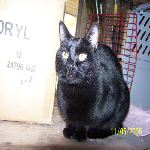

In [7]:
print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [8]:
#스케일링 안된 이미지
train_imgs[0]

array([[[247., 240., 212.],
        [246., 244., 223.],
        [248., 249., 233.],
        ...,
        [ 49.,  37.,  25.],
        [ 48.,  34.,  23.],
        [ 48.,  38.,  36.]],

       [[247., 240., 214.],
        [243., 241., 220.],
        [249., 250., 234.],
        ...,
        [ 48.,  40.,  37.],
        [ 44.,  36.,  34.],
        [ 37.,  36.,  41.]],

       [[244., 236., 213.],
        [244., 241., 222.],
        [250., 251., 237.],
        ...,
        [ 52.,  54.,  67.],
        [ 80.,  87., 105.],
        [ 77.,  88., 106.]],

       ...,

       [[182., 162., 153.],
        [183., 162., 157.],
        [186., 165., 162.],
        ...,
        [ 95.,  84.,  92.],
        [ 95.,  91.,  92.],
        [103.,  85., 101.]],

       [[161., 137., 125.],
        [175., 151., 141.],
        [185., 160., 153.],
        ...,
        [ 60.,  40.,  39.],
        [ 94.,  79.,  72.],
        [112.,  92.,  83.]],

       [[192., 165., 148.],
        [179., 151., 137.],
        [181., 1

In [9]:
#스케일링된 이미지
train_imgs_scaled[0]

array([[[0.96862745, 0.9411765 , 0.83137256],
        [0.9647059 , 0.95686275, 0.8745098 ],
        [0.972549  , 0.9764706 , 0.9137255 ],
        ...,
        [0.19215687, 0.14509805, 0.09803922],
        [0.1882353 , 0.13333334, 0.09019608],
        [0.1882353 , 0.14901961, 0.14117648]],

       [[0.96862745, 0.9411765 , 0.8392157 ],
        [0.9529412 , 0.94509804, 0.8627451 ],
        [0.9764706 , 0.98039216, 0.91764706],
        ...,
        [0.1882353 , 0.15686275, 0.14509805],
        [0.17254902, 0.14117648, 0.13333334],
        [0.14509805, 0.14117648, 0.16078432]],

       [[0.95686275, 0.9254902 , 0.8352941 ],
        [0.95686275, 0.94509804, 0.87058824],
        [0.98039216, 0.9843137 , 0.92941177],
        ...,
        [0.20392157, 0.21176471, 0.2627451 ],
        [0.3137255 , 0.34117648, 0.4117647 ],
        [0.3019608 , 0.34509805, 0.41568628]],

       ...,

       [[0.7137255 , 0.63529414, 0.6       ],
        [0.7176471 , 0.63529414, 0.6156863 ],
        [0.7294118 , 0

In [10]:
batch_size = 30
num_classes = 2
epochs = 15
input_shape = (150, 150, 3)

# encode text category labels
#라벨 인코더
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)


print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 1 1 1 1 1]


In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [2]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

NameError: name 'model' is not defined

In [12]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/15
100/100 [==============================] - 79s 785ms/step - loss: 1.1307 - accuracy: 0.5131 - val_loss: 0.6455 - val_accuracy: 0.6510
Epoch 2/15
100/100 [==============================] - 78s 782ms/step - loss: 0.6497 - accuracy: 0.6320 - val_loss: 0.5907 - val_accuracy: 0.6780
Epoch 3/15
100/100 [==============================] - 78s 780ms/step - loss: 0.5821 - accuracy: 0.7059 - val_loss: 0.5585 - val_accuracy: 0.7200
Epoch 4/15
100/100 [==============================] - 83s 826ms/step - loss: 0.4733 - accuracy: 0.7732 - val_loss: 0.5680 - val_accuracy: 0.7270
Epoch 5/15
100/100 [==============================] - 79s 795ms/step - loss: 0.4140 - accuracy: 0.8184 - val_loss: 0.5658 - val_accuracy: 0.7390
Epoch 6/15
100/100 [==============================] - 78s 784ms/step - loss: 0.3230 - accuracy: 0.8615 - val_loss: 0.6137 - val_accuracy: 0.7210
Epoch 7/15
100/100 [==============================] - 84s 841ms/step - loss: 0.2119 - accuracy: 0.9080 - val_loss: 0.6736 - val_ac

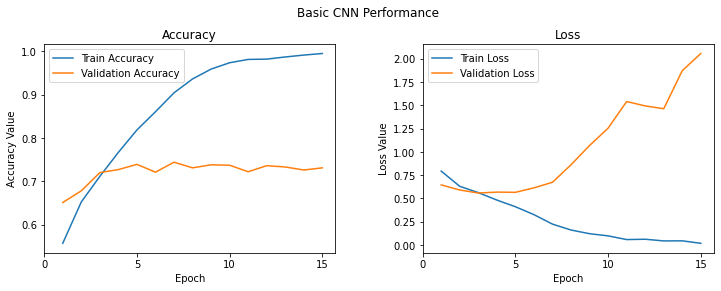

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,16))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [20]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [21]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/15
100/100 [==============================] - 69s 684ms/step - loss: 0.7307 - accuracy: 0.4988 - val_loss: 0.7169 - val_accuracy: 0.5070
Epoch 2/15
100/100 [==============================] - 68s 682ms/step - loss: 0.6659 - accuracy: 0.5875 - val_loss: 0.6244 - val_accuracy: 0.6550
Epoch 3/15
100/100 [==============================] - 69s 690ms/step - loss: 0.6429 - accuracy: 0.6182 - val_loss: 0.6363 - val_accuracy: 0.6310
Epoch 4/15
100/100 [==============================] - 85s 850ms/step - loss: 0.6000 - accuracy: 0.6752 - val_loss: 0.6026 - val_accuracy: 0.6690
Epoch 5/15
100/100 [==============================] - 72s 720ms/step - loss: 0.5716 - accuracy: 0.7111 - val_loss: 0.5477 - val_accuracy: 0.7290
Epoch 6/15
100/100 [==============================] - 71s 709ms/step - loss: 0.5151 - accuracy: 0.7561 - val_loss: 0.5369 - val_accuracy: 0.7300
Epoch 7/15
100/100 [==============================] - 76s 759ms/step - loss: 0.4695 - accuracy: 0.7723 - val_loss: 0.5260 - val_ac

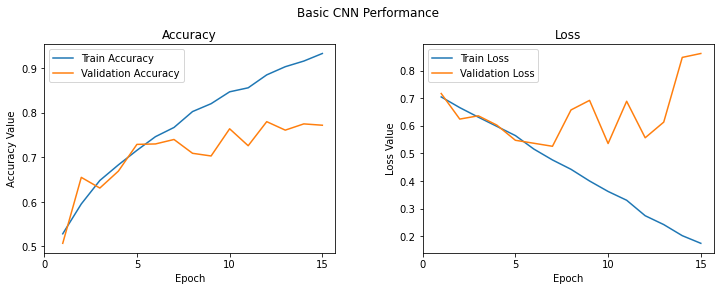

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,16))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [25]:
model.save('cats_dogs_basic_cnn.h5')